# GloVe 실습

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1 # 1을 왜 더하지? 15개가 맞는 것 같은데..
print(vocab_size)

16


In [4]:
X_encoded = tokenizer.texts_to_sequences(sentences)
print(X_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [5]:
max_len = max(len(l) for l in X_encoded)
print(max_len)

4


In [6]:
X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [7]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

In [8]:
# GloVe 다운로드 및 압축해제
urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

In [9]:
embedding_dict = dict()

f = open('glove.6B.50d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    # 50개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [10]:
print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

[-0.73561  -0.35295   0.17907  -0.93009   1.5901   -0.20534  -0.17829
  0.13656  -0.33916   0.69966  -0.42162  -1.1377    0.2608    0.099557
  0.18591  -0.81209   0.36996  -0.099477 -0.24003  -0.16256  -0.21501
 -0.038879  0.00816   0.3083    0.42441   0.072954 -0.96597  -0.19876
  0.3843    0.44995   1.3365    0.39146   0.81936   0.19135   0.48073
 -0.15956   0.037837  1.1447   -0.62182  -1.0824   -0.16087  -0.75431
  0.017611  0.54504  -0.83774  -0.14587  -0.22146   0.31283   0.70472
  0.47657 ]
50


In [11]:
embedding_matrix = np.zeros((vocab_size, 50))
np.shape(embedding_matrix)

(16, 50)

In [12]:
print(tokenizer.word_index.items())

dict_items([('nice', 1), ('great', 2), ('best', 3), ('amazing', 4), ('stop', 5), ('lies', 6), ('pitiful', 7), ('nerd', 8), ('excellent', 9), ('work', 10), ('supreme', 11), ('quality', 12), ('bad', 13), ('highly', 14), ('respectable', 15)])


In [13]:
tokenizer.word_index['great']

2

In [14]:
print(embedding_dict['great'])

[-0.026567  1.3357   -1.028    -0.3729    0.52012  -0.12699  -0.35433
  0.37824  -0.29716   0.093894 -0.034122  0.92961  -0.14023  -0.63299
  0.020801 -0.21533   0.96923   0.47654  -1.0039   -0.24013  -0.36325
 -0.004757 -0.5148   -0.4626    1.2447   -1.8316   -1.5581   -0.37465
  0.53362   0.20883   3.2209    0.64549   0.37438  -0.17657  -0.024164
  0.33786  -0.419     0.40081  -0.11449   0.051232 -0.15205   0.29855
 -0.44052   0.11089  -0.24633   0.66251  -0.26949  -0.49658  -0.41618
 -0.2549  ]


In [15]:
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = embedding_dict.get(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

In [16]:
embedding_matrix[2]

array([-0.026567  ,  1.33570004, -1.028     , -0.37290001,  0.52012002,
       -0.12699001, -0.35433   ,  0.37823999, -0.29716   ,  0.093894  ,
       -0.034122  ,  0.92961001, -0.14023   , -0.63299   ,  0.020801  ,
       -0.21533   ,  0.96923   ,  0.47654   , -1.00390005, -0.24013001,
       -0.36324999, -0.004757  , -0.51480001, -0.46259999,  1.24469995,
       -1.83159995, -1.55809999, -0.37465   ,  0.53362   ,  0.20883   ,
        3.22090006,  0.64548999,  0.37437999, -0.17657   , -0.024164  ,
        0.33785999, -0.419     ,  0.40081   , -0.11449   ,  0.051232  ,
       -0.15205   ,  0.29855001, -0.44051999,  0.11089   , -0.24632999,
        0.66250998, -0.26949   , -0.49658   , -0.41618001, -0.25490001])

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
e = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 2s - loss: 0.6984 - acc: 0.5714 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 0.6836 - acc: 0.5714 - 3ms/epoch - 3ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6690 - acc: 0.5714 - 4ms/epoch - 4ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6548 - acc: 0.5714 - 3ms/epoch - 3ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6408 - acc: 0.5714 - 3ms/epoch - 3ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6271 - acc: 0.7143 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6137 - acc: 0.7143 - 3ms/epoch - 3ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6006 - acc: 0.7143 - 4ms/epoch - 4ms/step
Epoch 9/100
1/1 - 0s - loss: 0.5879 - acc: 0.7143 - 3ms/epoch - 3ms/step
Epoch 10/100
1/1 - 0s - loss: 0.5755 - acc: 0.7143 - 3ms/epoch - 3ms/step
Epoch 11/100
1/1 - 0s - loss: 0.5634 - acc: 0.7143 - 4ms/epoch - 4ms/step
Epoch 12/100
1/1 - 0s - loss: 0.5517 - acc: 0.7143 - 3ms/epoch - 3ms/step
Epoch 13/100
1/1 - 0s - loss: 0.5403 - acc: 0.7143 - 2ms/epoch - 2ms/step
Epoch 14/100
1/1 - 0s - loss: 0.5292 - acc: 0.714

In [18]:
model.predict(X_train)

1/1 [==============================] - 0s 43ms/step


array([[0.90519017],
       [0.16081284],
       [0.12968417],
       [0.9209639 ],
       [0.8885954 ],
       [0.2646559 ],
       [0.8284057 ]], dtype=float32)

# 로이터 뉴스 실습
## 1. 로이터 뉴스 데이터 이해

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [3]:
print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


In [4]:
print(X_train[0]) # 첫번째 훈련용 뉴스 기사
print(y_train[0]) # 첫번째 훈련용 뉴스 기사의 레이블

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


뉴스 기사의 최대 길이 : 2376
뉴스 기사의 평균 길이 : 145.5398574927633


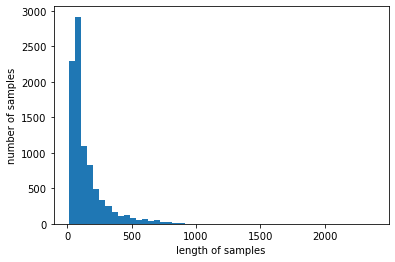

In [5]:
print('뉴스 기사의 최대 길이 : {}'.format(max(len(l) for l in X_train)))
print('뉴스 기사의 평균 길이 : {}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

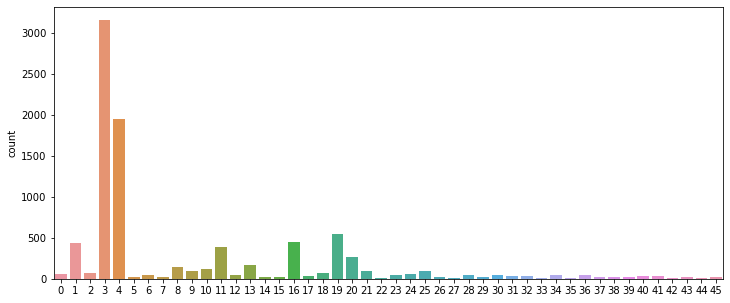

In [6]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [7]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [8]:
word_to_index = reuters.get_word_index()
print(word_to_index)
# word_to_index는 올바른 indexing인데 정작 index_to_word는 +3한 index를 사용한다.
# 왜냐하면 reuters dataset에서 위와 같은 인덱스를 사용하기 때문

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 16266, 'slickline': 20692, 'doldrums': 13799, 'kids': 12092, 'cl

In [9]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

In [10]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[4]))

빈도수 상위 1번 단어 : the


In [11]:
print('빈도수 상위 1000등 단어 : {}'.format(index_to_word[1003]))

빈도수 상위 1000등 단어 : limit


In [12]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[200]]))

<sos> japan's seasonally adjusted unemployment rate rose to a record 3 0 pct in january the worst since the government started compiling unemployment statistics under its current system in 1953 up from the previous record 2 9 pct in december the government's management and coordination agency said unemployment was up from 2 8 pct a year earlier unadjusted january unemployment totalled 1 82 mln people up from 1 61 mln in december and 1 65 mln a year earlier male unemployment in january remained at 2 9 pct equal to the second worst level set last december record male unemployement of 3 1 pct was set in july 1986 female unemployment in january remained at 3 0 pct equal to the record level marked in april august september and december last year january's record 3 0 pct unemployment rate mainly stemmed from loss of jobs in manufacturing industries particularly in export related firms due to the yen's continuing appreciation against the dollar officials said employment in manufacturing indus

In [13]:
X_train[200]

[1,
 603,
 878,
 466,
 961,
 101,
 138,
 6,
 10,
 146,
 12,
 70,
 20,
 7,
 110,
 4,
 2414,
 224,
 4,
 106,
 1128,
 7317,
 961,
 754,
 136,
 25,
 143,
 298,
 7,
 8610,
 84,
 22,
 4,
 375,
 146,
 32,
 72,
 20,
 7,
 207,
 4,
 816,
 362,
 9,
 2655,
 580,
 8,
 961,
 34,
 84,
 22,
 32,
 63,
 20,
 10,
 29,
 157,
 1832,
 110,
 961,
 1002,
 19,
 996,
 11,
 872,
 84,
 22,
 19,
 860,
 11,
 7,
 207,
 9,
 19,
 566,
 11,
 10,
 29,
 157,
 6635,
 961,
 7,
 110,
 1290,
 28,
 32,
 72,
 20,
 1363,
 6,
 4,
 390,
 2414,
 320,
 306,
 54,
 207,
 146,
 6635,
 29124,
 5,
 12,
 19,
 20,
 34,
 306,
 7,
 429,
 48,
 8439,
 961,
 7,
 110,
 1290,
 28,
 12,
 70,
 20,
 1363,
 6,
 4,
 146,
 320,
 2804,
 7,
 93,
 748,
 397,
 9,
 207,
 54,
 29,
 2531,
 146,
 12,
 70,
 20,
 961,
 101,
 958,
 8744,
 22,
 46,
 5,
 1595,
 7,
 901,
 422,
 1171,
 7,
 198,
 963,
 561,
 208,
 6,
 4,
 2167,
 905,
 2375,
 112,
 4,
 113,
 173,
 8,
 1427,
 7,
 901,
 422,
 202,
 2722,
 18,
 22,
 10,
 29,
 157,
 6,
 187,
 124,
 11,
 348,
 19,
 928,
 1

In [14]:
index_to_word[70]

'0'

불용어 제거

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt

#nltk의 불용어 리스트
stop_words = set(stopwords.words('english'))

In [17]:
num_lst=[str(i) for i in range(10000)]

In [18]:
#필요 없는 단어
stop_words.update(['000','also','0','reuter','u','000', '03', '04', '09', '1985', '1986', '1987', '1988', '86',
       '87', '92', 'about','said','year','one','two','three','four','five','six','seven','eight','nine','ten','could','would']+num_lst)

In [19]:
#문장 추출
to_txt=[]
for i in range(8982):
  
    to_txt.append(' '.join([index_to_word[index] for index in X_train[i]])[6:])
    
for i in range(2246):
    to_txt.append(' '.join([index_to_word[index] for index in X_test[i]])[6:])

In [20]:
to_txt[1]

"generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3"

In [21]:
to_txt[0].split(' ')

['mcgrath',
 'rentcorp',
 'said',
 'as',
 'a',
 'result',
 'of',
 'its',
 'december',
 'acquisition',
 'of',
 'space',
 'co',
 'it',
 'expects',
 'earnings',
 'per',
 'share',
 'in',
 '1987',
 'of',
 '1',
 '15',
 'to',
 '1',
 '30',
 'dlrs',
 'per',
 'share',
 'up',
 'from',
 '70',
 'cts',
 'in',
 '1986',
 'the',
 'company',
 'said',
 'pretax',
 'net',
 'should',
 'rise',
 'to',
 'nine',
 'to',
 '10',
 'mln',
 'dlrs',
 'from',
 'six',
 'mln',
 'dlrs',
 'in',
 '1986',
 'and',
 'rental',
 'operation',
 'revenues',
 'to',
 '19',
 'to',
 '22',
 'mln',
 'dlrs',
 'from',
 '12',
 '5',
 'mln',
 'dlrs',
 'it',
 'said',
 'cash',
 'flow',
 'per',
 'share',
 'this',
 'year',
 'should',
 'be',
 '2',
 '50',
 'to',
 'three',
 'dlrs',
 'reuter',
 '3']

In [22]:
sen_lst=[]
for sentence in to_txt:
    sen_lst.append(sentence.split(' '))

In [23]:
result_doc=[]
for sentence in sen_lst:
    result_sen=[]
    for word in sentence:
        if word not in stop_words:
            result_sen.append(word)
    result_doc.append(result_sen)

In [24]:
result_doc

[['mcgrath',
  'rentcorp',
  'result',
  'december',
  'acquisition',
  'space',
  'co',
  'expects',
  'earnings',
  'per',
  'share',
  'dlrs',
  'per',
  'share',
  'cts',
  'company',
  'pretax',
  'net',
  'rise',
  'mln',
  'dlrs',
  'mln',
  'dlrs',
  'rental',
  'operation',
  'revenues',
  'mln',
  'dlrs',
  'mln',
  'dlrs',
  'cash',
  'flow',
  'per',
  'share',
  'dlrs'],
 ['generale',
  'de',
  'banque',
  'sa',
  'lt',
  'genb',
  'br',
  'lt',
  'heller',
  'overseas',
  'corp',
  'chicago',
  'taken',
  'pct',
  'stakes',
  'factoring',
  'company',
  'sa',
  'belgo',
  'factors',
  'generale',
  'de',
  'banque',
  'statement',
  'gave',
  'financial',
  'details',
  'transaction',
  'sa',
  'belgo',
  "factors'",
  'turnover',
  'billion',
  'belgian',
  'francs'],
 ['shr',
  'dlrs',
  'vs',
  'cts',
  'shr',
  'diluted',
  'dlrs',
  'vs',
  'cts',
  'net',
  'mln',
  'vs',
  'avg',
  'shrs',
  'mln',
  'vs',
  'mln',
  'shr',
  'dlrs',
  'vs',
  'dlrs',
  'shr',
  'd

In [25]:
to_txt_clear=[]
for sen in result_doc:
    to_txt_clear.append(' '.join(sen))

In [26]:
len(to_txt_clear)

11228

In [27]:
y=list(y_train)+list(y_test)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_dtm = vect.fit_transform(to_txt_clear)
X_dtm = X_dtm.toarray()
X_new = SelectKBest(chi2, k=500).fit(X_dtm, y)
TorF = X_new.get_support()
TorF
import numpy as np
word_view=np.array(vect.get_feature_names())
sw=word_view[TorF]

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
sw

array(['acceptances', 'accord', 'account', 'acquisition', 'acreage',
       'acres', 'adjusted', 'ago', 'agreement', 'agriculture', 'aguayo',
       'alcan', 'alcoa', 'alfredo', 'almaden', 'alumina', 'aluminium',
       'aluminum', 'amt', 'apartheid', 'apex', 'arabia', 'arkla', 'armco',
       'arsenide', 'asa', 'asturiana', 'atpc', 'austmet', 'avg', 'aziz',
       'azpurua', 'bags', 'baker', 'bales', 'band', 'bank', 'banks',
       'barge', 'barley', 'barrel', 'barrels', 'base', 'beans', 'beef',
       'beet', 'billion', 'billiton', 'bills', 'bird', 'bolivia',
       'boswell', 'box', 'boxes', 'bpd', 'bra', 'brazil', 'briggs',
       'brooklyn', 'budget', 'bue', 'buffer', 'bullion', 'bundesbank',
       'cane', 'cargo', 'cargoes', 'carload', 'cathode', 'cattle',
       'central', 'chang', 'chemical', 'chicken', 'citrosuco', 'citrus',
       'clones', 'cocoa', 'cocoas', 'coffee', 'coincident', 'coins',
       'colombia', 'comibol', 'cominco', 'company', 'compared',
       'completions'

In [30]:
sw_idx=[]

for word in sw:
    sw_idx.append(word_to_index[word]+3)

In [31]:
len(sw_idx)

500

## 2. LSTM을 활용한 로이터 뉴스 분류

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import reuters
import numpy as np

In [33]:

max_len = 100

(X_train, y_train), (X_test, y_test) = reuters.load_data(test_split=0.2)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8982, 100)
(8982,)
(2246, 100)
(2246,)


In [35]:
X_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     1, 27595, 28842,     8,    43,
          10,   447,     5,    25,   207,   270,     5,  3095,   111,
          16,   369,   186,    90,    67,     7,    89,     5,    19,
         102,     6,    19,   124,    15,    90,    67,    84,    22,
         482,    26,     7,    48,     4,    49,     8,   864,    39,
         209,   154,     6,   151,     6,    83,    11,    15,    22,
         155,    11,    15,     7,    48,     9,  4579,  1005,   504,
           6,   258,     6,   272,    11,    15,    22,   134,    44,
          11,    15,    16,     8,   197,  1245,    90,    67,    52,
          29,   209,    30,    32,   132,     6,   109,    15,    17,
          12])

In [36]:
category_list = []
for i in range(46):
    category_list.append(0)
print(len(category_list))

46


In [37]:
for i in y_train:
    category_list[i] += 1

In [38]:
extracted_index = []

for i, v in enumerate(category_list):
    if v >= 100:
        print(i, v)
        extracted_index.append(i)

print(extracted_index)

1 432
3 3159
4 1949
8 139
9 101
10 124
11 390
13 172
16 444
19 549
20 269
21 100
[1, 3, 4, 8, 9, 10, 11, 13, 16, 19, 20, 21]


In [61]:
extracted_train_data = []
for i, v in enumerate(y_train):
    if v in extracted_index:
        extracted_train_data.append(X_train[i])

In [62]:
extracted_train_labels = []
for i, v in enumerate(y_train):
    if v in extracted_index:
        extracted_train_labels.append(y_train[i])

In [63]:
extracted_test_data = []
for i, v in enumerate(y_test):
    if v in extracted_index:
        extracted_test_data.append(X_test[i])

In [64]:
extracted_test_labels = []
for i, v in enumerate(y_test):
    if v in extracted_index:
        extracted_test_labels.append(y_test[i])

In [65]:
extracted_train_data=np.array(extracted_train_data)
extracted_test_data=np.array(extracted_test_data)
extracted_train_labels=np.array(extracted_train_labels)
extracted_test_labels=np.array(extracted_test_labels)

In [66]:
print(extracted_train_data.shape)
print(extracted_train_labels.shape)
print(extracted_test_data.shape)
print(extracted_test_labels.shape)

(7828, 100)
(7828,)
(1934, 100)
(1934,)


In [67]:
sw_idx=sw_idx+[0,1,2]

In [ ]:
#chi로 선별된 단어로 feature selection
for i in range(len(extracted_train_data)):
    for j in range(len(extracted_train_data[i])):
        if extracted_train_data[i][j] not in sw_idx:
            extracted_train_data[i][j]=2
            

In [47]:
for i in range(len(extracted_test_data)):
    for j in range(len(extracted_test_data[i])):
        if extracted_test_data[i][j] not in sw_idx:
            extracted_test_data[i][j]=2

In [ ]:
extracted_train_data[0]

In [49]:
sw_idx

[3048,
 562,
 485,
 270,
 1302,
 1148,
 466,
 301,
 120,
 309,
 10120,
 3323,
 8263,
 11840,
 8720,
 6482,
 1522,
 2176,
 8392,
 8761,
 9053,
 1048,
 10402,
 9268,
 9984,
 3937,
 15391,
 4284,
 10830,
 180,
 5612,
 4180,
 1232,
 568,
 2165,
 1399,
 60,
 171,
 3432,
 1425,
 523,
 428,
 623,
 2710,
 935,
 1871,
 35,
 8161,
 723,
 5162,
 4807,
 10632,
 7311,
 5607,
 402,
 4018,
 569,
 13732,
 7521,
 386,
 9154,
 741,
 3976,
 637,
 2007,
 1587,
 2110,
 15091,
 7290,
 1603,
 204,
 6083,
 873,
 6957,
 13727,
 3174,
 8070,
 665,
 6539,
 357,
 11451,
 2059,
 1856,
 8177,
 3169,
 49,
 217,
 8348,
 8056,
 3638,
 4956,
 9645,
 526,
 930,
 498,
 843,
 399,
 81,
 877,
 590,
 190,
 5563,
 9602,
 463,
 1097,
 317,
 5360,
 26,
 1396,
 689,
 227,
 143,
 240,
 11956,
 2126,
 2943,
 368,
 207,
 253,
 919,
 287,
 213,
 1920,
 2336,
 15,
 113,
 260,
 2060,
 5908,
 237,
 168,
 308,
 1224,
 1404,
 1427,
 387,
 10718,
 13219,
 7286,
 8464,
 6222,
 7484,
 294,
 108,
 9712,
 691,
 198,
 162,
 2014,
 1808,
 1326

In [50]:
dict_value=[i+4 for i in range(500)]+[0,1,2]

In [52]:
re_dict={}
for i in range(503):
    re_dict[sw_idx[i]]=dict_value[i]

In [53]:
re_dict

{3048: 4,
 562: 5,
 485: 6,
 270: 7,
 1302: 8,
 1148: 9,
 466: 10,
 301: 11,
 120: 12,
 309: 13,
 10120: 14,
 3323: 15,
 8263: 16,
 11840: 17,
 8720: 18,
 6482: 19,
 1522: 20,
 2176: 21,
 8392: 22,
 8761: 23,
 9053: 24,
 1048: 25,
 10402: 26,
 9268: 27,
 9984: 28,
 3937: 29,
 15391: 30,
 4284: 31,
 10830: 32,
 180: 33,
 5612: 34,
 4180: 35,
 1232: 36,
 568: 37,
 2165: 38,
 1399: 39,
 60: 40,
 171: 41,
 3432: 42,
 1425: 43,
 523: 44,
 428: 45,
 623: 46,
 2710: 47,
 935: 48,
 1871: 49,
 35: 50,
 8161: 51,
 723: 52,
 5162: 53,
 4807: 54,
 10632: 55,
 7311: 56,
 5607: 57,
 402: 58,
 4018: 59,
 569: 60,
 13732: 61,
 7521: 62,
 386: 63,
 9154: 64,
 741: 65,
 3976: 66,
 637: 67,
 2007: 68,
 1587: 69,
 2110: 70,
 15091: 71,
 7290: 72,
 1603: 73,
 204: 74,
 6083: 75,
 873: 76,
 6957: 77,
 13727: 78,
 3174: 79,
 8070: 80,
 665: 81,
 6539: 82,
 357: 83,
 11451: 84,
 2059: 85,
 1856: 86,
 8177: 87,
 3169: 88,
 49: 89,
 217: 90,
 8348: 91,
 8056: 92,
 3638: 93,
 4956: 94,
 9645: 95,
 526: 96,
 930:

In [54]:
#임베딩을 하기 위해 변환
for i in range(len(extracted_train_data)):
    for j in range(len(extracted_train_data[i])):
        extracted_train_data[i][j]=re_dict[extracted_train_data[i][j]]

In [55]:
for i in range(len(extracted_test_data)):
    for j in range(len(extracted_test_data[i])):
        extracted_test_data[i][j]=re_dict[extracted_test_data[i][j]]

In [56]:
# 인덱스를 정렬
extracted_index_dict = {}
for i, v in enumerate(extracted_index):
    extracted_index_dict[v] = i

In [57]:
extracted_train_labels_sorted = []
for v in extracted_train_labels:
    extracted_train_labels_sorted.append(extracted_index_dict[v])

In [58]:
extracted_test_labels_sorted = []
for v in extracted_test_labels:
    extracted_test_labels_sorted.append(extracted_index_dict[v])

In [59]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(extracted_train_labels_sorted)
one_hot_test_labels = to_categorical(extracted_test_labels_sorted)

In [60]:
vocab_size = 503
embedding_dim = 128
hidden_units = 128
num_classes = 12

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [64]:
extracted_train_data

array([[  0,   0,   0, ..., 128,   2,   2],
       [  0,   0,   0, ...,   2,   2,   2],
       [  2,   2, 128, ..., 296,   2,   2],
       ...,
       [  2,   2,   2, ...,   2,   2,   2],
       [  2,   2,   2, ...,   2,   2,   2],
       [400,   2,   2, ..., 372,   2,   2]])

In [61]:
history = model.fit(extracted_train_data, one_hot_train_labels, batch_size=128, epochs=50, callbacks=[es, mc],
                    validation_data=(extracted_test_data, one_hot_test_labels))

Epoch 1/50
58/62 [===========================>..] - ETA: 0s - loss: 1.8903 - acc: 0.3959
Epoch 1: val_acc improved from -inf to 0.44571, saving model to best_model.h5
62/62 [==============================] - 3s 17ms/step - loss: 1.8762 - acc: 0.3970 - val_loss: 1.7545 - val_acc: 0.4457
Epoch 2/50
60/62 [============================>.] - ETA: 0s - loss: 1.4072 - acc: 0.5263
Epoch 2: val_acc improved from 0.44571 to 0.52378, saving model to best_model.h5
62/62 [==============================] - 1s 11ms/step - loss: 1.4081 - acc: 0.5264 - val_loss: 1.4467 - val_acc: 0.5238
Epoch 3/50
61/62 [============================>.] - ETA: 0s - loss: 1.3842 - acc: 0.5572
Epoch 3: val_acc improved from 0.52378 to 0.60238, saving model to best_model.h5
62/62 [==============================] - 1s 11ms/step - loss: 1.3843 - acc: 0.5572 - val_loss: 1.2944 - val_acc: 0.6024
Epoch 4/50
60/62 [============================>.] - ETA: 0s - loss: 1.2067 - acc: 0.6122
Epoch 4: val_acc improved from 0.60238 to 0.

In [62]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(extracted_test_data, one_hot_test_labels)[1]))

61/61 [==============================] - 0s 4ms/step - loss: 0.8455 - acc: 0.7590

 테스트 정확도: 0.7590


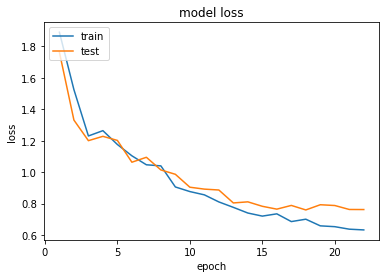

In [294]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

svm 분류

In [51]:
# 모든 프로젝트에 해당되는 패키지를 먼저 임포트
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [52]:
#re_index 하기 전 불용어처리, chi2 500 피처셀렉션 한 데이터 쓸것
print(extracted_train_data.shape)
print(extracted_train_labels.shape)
print(extracted_test_data.shape)
print(extracted_test_labels.shape)

(7828, 100)
(7828,)
(1934, 100)
(1934,)


In [53]:
# 텍스트데이터로 복원
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 인덱스 +3
index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [54]:
# 전체 학습데이터 복원
decoded = []
for i in range(len(extracted_train_data)):
    t = ' '.join([index_to_word[index] for index in extracted_train_data[i]])
    decoded.append(t)

extracted_train_data = decoded

In [55]:
# 전체 테스트데이터 복원
decoded = []
for i in range(len(extracted_test_data)):
    t = ' '.join([index_to_word[index] for index in extracted_test_data[i]])
    decoded.append(t)

extracted_test_data = decoded

In [56]:
# DTM 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(extracted_train_data)
print(x_train_dtm.shape)

# 테스트데이터
x_test_dtm = dtmvector.transform(extracted_test_data) #테스트 데이터를 DTM으로 변환

(7828, 389)


In [57]:
# TF-IDF Matrix확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

# 테스트데이터
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(7828, 389)


In [58]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, extracted_train_labels)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(extracted_test_labels, predicted)) #예측값과 실제값 비교

정확도: 0.7730093071354706


C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [59]:
mod = MultinomialNB()
mod.fit(tfidfv, extracted_train_labels)

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(extracted_test_labels, predicted)) #예측값과 실제값 비교


정확도: 0.5739400206825233


In [60]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, extracted_train_labels)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(extracted_test_labels, predicted)) #예측값과 실제값 비교

정확도: 0.7916235780765254


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Textcuboid
## 1) import GloVe

In [49]:
import numpy as np

In [50]:
# GloVe 다운로드 및 압축해제

# from urllib.request import urlretrieve, urlopen
# import gzip
# import zipfile

# urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
# zf = zipfile.ZipFile('glove.6B.zip')
# zf.extractall() 
# zf.close()

In [51]:
embedding_dict = dict()

f = open('glove.6B.50d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    # 50개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [52]:
print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

[-0.73561  -0.35295   0.17907  -0.93009   1.5901   -0.20534  -0.17829
  0.13656  -0.33916   0.69966  -0.42162  -1.1377    0.2608    0.099557
  0.18591  -0.81209   0.36996  -0.099477 -0.24003  -0.16256  -0.21501
 -0.038879  0.00816   0.3083    0.42441   0.072954 -0.96597  -0.19876
  0.3843    0.44995   1.3365    0.39146   0.81936   0.19135   0.48073
 -0.15956   0.037837  1.1447   -0.62182  -1.0824   -0.16087  -0.75431
  0.017611  0.54504  -0.83774  -0.14587  -0.22146   0.31283   0.70472
  0.47657 ]
50


## 2) import Reuters data

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.datasets import reuters

In [54]:
# 사용 빈도수가 높은 상위 (num_words)개의 단어만 사용, 여기엔 pad, sos, unk, NULL 포함하므로 사실상 (num_words-4)개의 단어 사용
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=104, test_split=0.2)

In [55]:
# 몇 번째 단어 사용되었는지 확인(여기서 민중님이 103까지만 인덱스가 있겠구나 싶음)
for i, l in enumerate(train_data):
    if 104 in l:
        print('yes')

In [56]:
print('훈련용 뉴스 기사 : {}'.format(len(train_data)))
print('테스트용 뉴스 기사 : {}'.format(len(test_data)))
num_classes = len(set(train_labels))
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


## 3) 전처리 및 textcuboid 생성

### (1) 상위 100개 단어에 대한 embedding matrix 생성

In [57]:
word_to_index = reuters.get_word_index()
print(word_to_index)
# word_to_index는 올바른 indexing인데 정작 index_to_word는 +3한 index를 사용한다.

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 16266, 'slickline': 20692, 'doldrums': 13799, 'kids': 12092, 'cl

In [58]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key # pad, sos, unk, NULL 포함

In [59]:
print('빈도수 상위 1000등 단어 : {}'.format(index_to_word[6]))

빈도수 상위 1000등 단어 : to


In [60]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")): # index=3은 NULL
    index_to_word[index] = token

In [61]:
# 인덱스 4~103의 단어 100개에 대한 embedding 매트릭스 생성
# 만약 뉴스에 쓰인 단어가 embedding_dict에 없을 때 오류 생길 듯
embeddings = [embedding_dict[index_to_word[4]]]
for index in range(1, 100):
    embeddings = np.concatenate([embeddings, [embedding_dict[index_to_word[index+4]]]])

In [62]:
embeddings

array([[ 0.418   ,  0.24968 , -0.41242 , ..., -0.18411 , -0.11514 ,
        -0.78581 ],
       [ 0.70853 ,  0.57088 , -0.4716  , ..., -0.22562 , -0.093918,
        -0.80375 ],
       [ 0.68047 , -0.039263,  0.30186 , ..., -0.073297, -0.064699,
        -0.26044 ],
       ...,
       [-0.15148 ,  0.12274 ,  0.99983 , ...,  0.70494 ,  1.0249  ,
         0.62233 ],
       [-0.080268,  0.45666 ,  0.80174 , ..., -0.48474 ,  0.090232,
         0.078301],
       [ 0.74048 , -0.1201  ,  0.039916, ...,  0.076487, -0.28012 ,
        -0.051703]], dtype=float32)

In [63]:
# 100개의 단어와 각 단어에 대한 50차원의 임베딩 벡터
embeddings.shape

(100, 50)

### (2) textcuboid 생성

In [64]:
# textcuboid for train 생성

textcuboid_index = []

for i in range(len(train_data)):
    document_matrix = np.zeros(100)
    for index in set(train_data[i]):
        if(index>3):
            document_matrix[index-4] = 1
    textcuboid_index.append(document_matrix)

textcuboid_index = np.array(textcuboid_index)

In [65]:
textcuboid_index

array([[1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [66]:
textcuboid = []

for document_index in textcuboid_index:
    # matrix_filter는 대각성분만 있는 필터임
    matrix_filter = np.identity(len(document_index)) * np.outer(np.ones(len(document_index)), document_index)
    textcuboid.append(np.dot(matrix_filter, embeddings))

textcuboid = np.array(textcuboid)

In [67]:
textcuboid[0]

array([[ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.70853001,  0.57088   , -0.4716    , ..., -0.22562   ,
        -0.093918  , -0.80374998],
       [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
        -0.064699  , -0.26043999],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.080268  ,  0.45666   ,  0.80173999, ..., -0.48473999,
         0.090232  ,  0.078301  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [68]:
textcuboid.shape

(8982, 100, 50)

In [69]:
# textcuboid for test 생성

textcuboid_test_index = []

for i in range(len(test_data)):
    document_matrix = np.zeros(100)
    for index in set(test_data[i]):
        if(index>3):
            document_matrix[index-4] = 1
    textcuboid_test_index.append(document_matrix)

textcuboid_test_index = np.array(textcuboid_test_index)

In [70]:
textcuboid_test_index

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.]])

In [71]:
textcuboid_test = []

for document_index in textcuboid_test_index:
    # matrix_filter는 대각성분만 있는 필터임
    matrix_filter = np.identity(len(document_index)) * np.outer(np.ones(len(document_index)), document_index)
    textcuboid_test.append(np.dot(matrix_filter, embeddings))

textcuboid_test = np.array(textcuboid_test)

In [72]:
textcuboid_test[0]

array([[ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.70853001,  0.57088   , -0.4716    , ..., -0.22562   ,
        -0.093918  , -0.80374998],
       [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
        -0.064699  , -0.26043999],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
textcuboid_test.shape

(2246, 100, 50)

### (3) 원핫인코딩으로 train_labels, test_labels를 벡터화

In [74]:
# 방법1) 함수를 직접 만들어
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [75]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [76]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [77]:
# 방법2) 케라스 내장함수 활용
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 4) 인공 신경망 아키텍처 구현

### 구조1 - type1

#### (1) 데이터 준비

In [78]:
textcuboid

array([[[ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
         -0.11514   , -0.78580999],
        [ 0.70853001,  0.57088   , -0.4716    , ..., -0.22562   ,
         -0.093918  , -0.80374998],
        [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
         -0.064699  , -0.26043999],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.080268  ,  0.45666   ,  0.80173999, ..., -0.48473999,
          0.090232  ,  0.078301  ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
         -0.11514   , -0.78580999],
        [ 0.70853001,  0.57088   , -0.4716    , ..., -0.22562   ,
         -0.093918  , -0.80374998],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [79]:
# term이 아니라 concept별로 flattening하기 위해 reshape의 order 파라미터를 F로
x_train = textcuboid.reshape(textcuboid.shape[0], textcuboid.shape[1]*textcuboid.shape[2], order='F')
x_test = textcuboid_test.reshape(textcuboid_test.shape[0], textcuboid_test.shape[1]*textcuboid_test.shape[2], order='F')

In [80]:
x_train.shape

(8982, 5000)

In [81]:
x_test.shape

(2246, 5000)

#### (2) 모델 구성

In [82]:
from keras import models
from keras import layers

a1t1_model = models.Sequential()
a1t1_model.add(layers.Dense(8192, activation='relu', input_shape=(5000,)))
a1t1_model.add(layers.Dense(4096, activation='relu'))
a1t1_model.add(layers.Dense(4096, activation='relu'))
a1t1_model.add(layers.Dense(2048, activation='relu'))
a1t1_model.add(layers.Dense(1024, activation='relu'))
a1t1_model.add(layers.Dense(512, activation='relu'))
a1t1_model.add(layers.Dense(46, activation='softmax'))

In [83]:
a1t1_model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [84]:
a1t1_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8192)              40968192  
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 46)               

#### (3) 훈련 검증

In [85]:
# 훈련 데이터에서 1000개의 샘플을 떼어서 validation으로 활용
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [86]:
history = a1t1_model.fit(partial_x_train,
                         partial_y_train,
                         epochs=20,
                         batch_size=512,
                         validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 11s 658ms/step - loss: 430.5885 - accuracy: 0.2804 - val_loss: 2.1301 - val_accuracy: 0.3900
Epoch 2/20
16/16 [==============================] - 10s 658ms/step - loss: 2.0135 - accuracy: 0.4899 - val_loss: 1.7955 - val_accuracy: 0.5610
Epoch 3/20
16/16 [==============================] - 10s 656ms/step - loss: 1.8184 - accuracy: 0.5420 - val_loss: 1.6112 - val_accuracy: 0.6070
Epoch 4/20
16/16 [==============================] - 11s 663ms/step - loss: 1.7390 - accuracy: 0.5772 - val_loss: 1.8124 - val_accuracy: 0.5170
Epoch 5/20
16/16 [==============================] - 11s 668ms/step - loss: 1.7298 - accuracy: 0.5941 - val_loss: 1.5776 - val_accuracy: 0.5960
Epoch 6/20
16/16 [==============================] - 11s 677ms/step - loss: 1.6795 - accuracy: 0.6035 - val_loss: 1.6498 - val_accuracy: 0.6420
Epoch 7/20
16/16 [==============================] - 11s 665ms/step - loss: 1.8320 - accuracy: 0.5925 - val_loss: 1.5454 - val_accuracy: 0.63

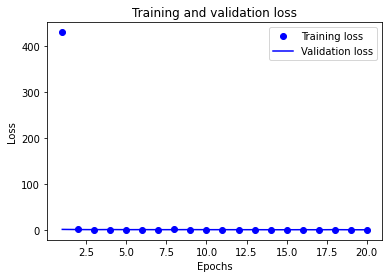

In [87]:
# 훈련과 검증 손실 그리기

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

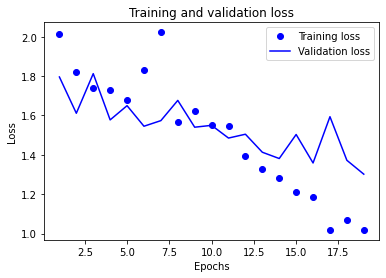

In [88]:
# 훈련과 검증 손실 그리기 (첫 번째 이상치 제거)

import matplotlib.pyplot as plt

loss = history.history['loss'][1:]
val_loss = history.history['val_loss'][1:]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

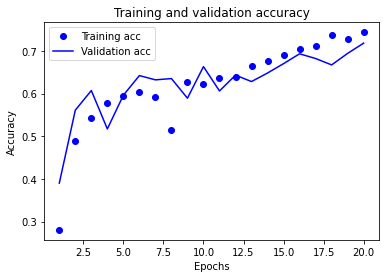

In [89]:
# 훈련과 검증 정확도 그리기

plt.clf() # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 구조2 - type1

#### (1) 데이터 준비

In [90]:
x_val_list = []
partial_x_train_list = []

for i in range(0, 50):
    globals()['x_val_'+str(i)] = textcuboid[:1000, :, i]
    globals()['partial_x_train_'+str(i)] = textcuboid[1000:, :, i]
    
    x_val_list.append(globals()['x_val_'+str(i)])
    partial_x_train_list.append(globals()['partial_x_train_'+str(i)])

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### (2) 모델 구성

In [91]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

In [92]:
concept_input_list = []
concept_embedding_list = []

for i in range(0, 50):
    globals()['concept_input_'+str(i)] = Input(shape=(100,))
    globals()['x_'+str(i)] = layers.Dense(256, activation='relu')(globals()['concept_input_'+str(i)])
    globals()['concept_embedding_'+str(i)] = layers.Dense(128, activation='relu')(globals()['x_'+str(i)])
    
    concept_input_list.append(globals()['concept_input_'+str(i)])
    concept_embedding_list.append(globals()['concept_embedding_'+str(i)])

In [93]:
concatenated = layers.concatenate(concept_embedding_list, axis=-1)

y = layers.Dense(8192, activation='relu')(concatenated)
y = layers.Dense(2048, activation='relu')(y)
y = layers.Dense(512, activation='relu')(y)
y = layers.Dense(128, activation='relu')(y)
answer = layers.Dense(46, activation='softmax')(y)

a2t1_model = Model(concept_input_list, answer)
a2t1_model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [94]:
a2t1_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 100)]        0                                            
______________________________________________________________________________________________

#### (3) 훈련 검증

In [95]:
history = a2t1_model.fit(partial_x_train_list,
                         partial_y_train,
                         epochs=20,
                         batch_size=512,
                         validation_data=(x_val_list, y_val))

Epoch 1/20
16/16 [==============================] - 12s 539ms/step - loss: 18.0880 - accuracy: 0.3498 - val_loss: 2.2822 - val_accuracy: 0.4680
Epoch 2/20
16/16 [==============================] - 8s 520ms/step - loss: 1.9101 - accuracy: 0.5203 - val_loss: 1.6957 - val_accuracy: 0.5940
Epoch 3/20
16/16 [==============================] - 8s 525ms/step - loss: 1.7975 - accuracy: 0.5832 - val_loss: 1.5758 - val_accuracy: 0.6320
Epoch 4/20
16/16 [==============================] - 8s 519ms/step - loss: 1.6219 - accuracy: 0.6161 - val_loss: 1.5652 - val_accuracy: 0.6360
Epoch 5/20
16/16 [==============================] - 8s 519ms/step - loss: 1.4984 - accuracy: 0.6441 - val_loss: 1.4997 - val_accuracy: 0.6630
Epoch 6/20
16/16 [==============================] - 8s 524ms/step - loss: 1.3868 - accuracy: 0.6724 - val_loss: 1.5830 - val_accuracy: 0.6150
Epoch 7/20
16/16 [==============================] - 8s 527ms/step - loss: 1.2729 - accuracy: 0.6882 - val_loss: 1.7660 - val_accuracy: 0.6130
Epoc

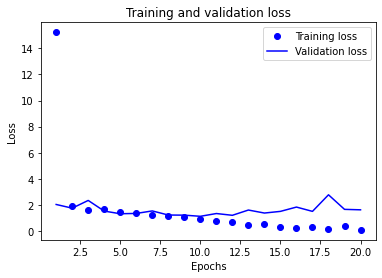

In [93]:
# 훈련과 검증 손실 그리기

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

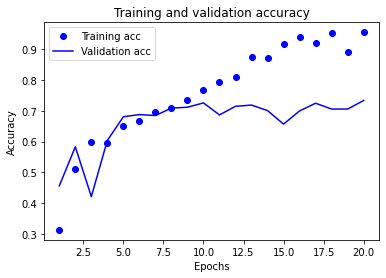

In [94]:
# 훈련과 검증 정확도 그리기

plt.clf() # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

-----

#### 다중 입력 모델 실습

In [95]:
from keras.models import Model
from keras import layers
from keras import Input

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(text_vocabulary_size, 64)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)

question_input = Input(shape=(None,), dtype='int32', name='question')
embedded_question = layers.Embedding(question_vocabulary_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)

answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)

model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [96]:
import numpy as np
from keras.utils.np_utils import to_categorical

num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))
answers = np.random.randint(0, answer_vocabulary_size, size=num_samples)
answers = to_categorical(answers)

model.fit([text, question], answers, epochs=10, batch_size=128)

Epoch 1/10
8/8 [==============================] - 5s 37ms/step - loss: 6.2145 - acc: 0.0020
Epoch 2/10
8/8 [==============================] - 0s 27ms/step - loss: 6.1972 - acc: 0.0320
Epoch 3/10
8/8 [==============================] - 0s 24ms/step - loss: 6.1446 - acc: 0.0050
Epoch 4/10
8/8 [==============================] - 0s 26ms/step - loss: 6.0526 - acc: 0.0050
Epoch 5/10
8/8 [==============================] - 0s 25ms/step - loss: 5.9931 - acc: 0.0050
Epoch 6/10
8/8 [==============================] - 0s 28ms/step - loss: 5.9180 - acc: 0.0050
Epoch 7/10
8/8 [==============================] - 0s 25ms/step - loss: 5.8060 - acc: 0.0080
Epoch 8/10
8/8 [==============================] - 0s 27ms/step - loss: 5.7164 - acc: 0.0230
Epoch 9/10
8/8 [==============================] - 0s 26ms/step - loss: 5.6274 - acc: 0.0310
Epoch 10/10
8/8 [==============================] - 0s 27ms/step - loss: 5.5472 - acc: 0.0490


In [97]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
question (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 64)     640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 32)     320000      question[0][0]                   
____________________________________________________________________________________________

In [98]:
text.shape

(1000, 100)

In [99]:
question.shape

(1000, 100)

In [100]:
answers.shape

(1000, 500)